#Last Lecture!

# NOTE: This is the code I used in class. So, its not commented, but maybe you can see learn something from it!

Announcements:

1. CAPEs due: Monday, June 7 at 8:00am

  1.   If >50% submit, everyone gets a bonus points
  2.   If >75% submit, everyone gets 2 bonus points

2. Discussion board 4
3. Final project is due Tuesday June 8th at midnight
  - Any 2 analysis techniques
  - Descriptive stats in analysis section -> mode for categorical
  

Topics:

1. Review!

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

lets get some data

In [10]:
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/LAozone.data')

In [11]:
data.head()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,3
1,5,5700,3,37,45,590,-24,128,100,4
2,5,5760,3,51,54,1450,25,139,60,5
3,6,5720,4,69,35,1568,15,121,60,6
4,4,5790,6,19,45,2631,-33,123,100,7


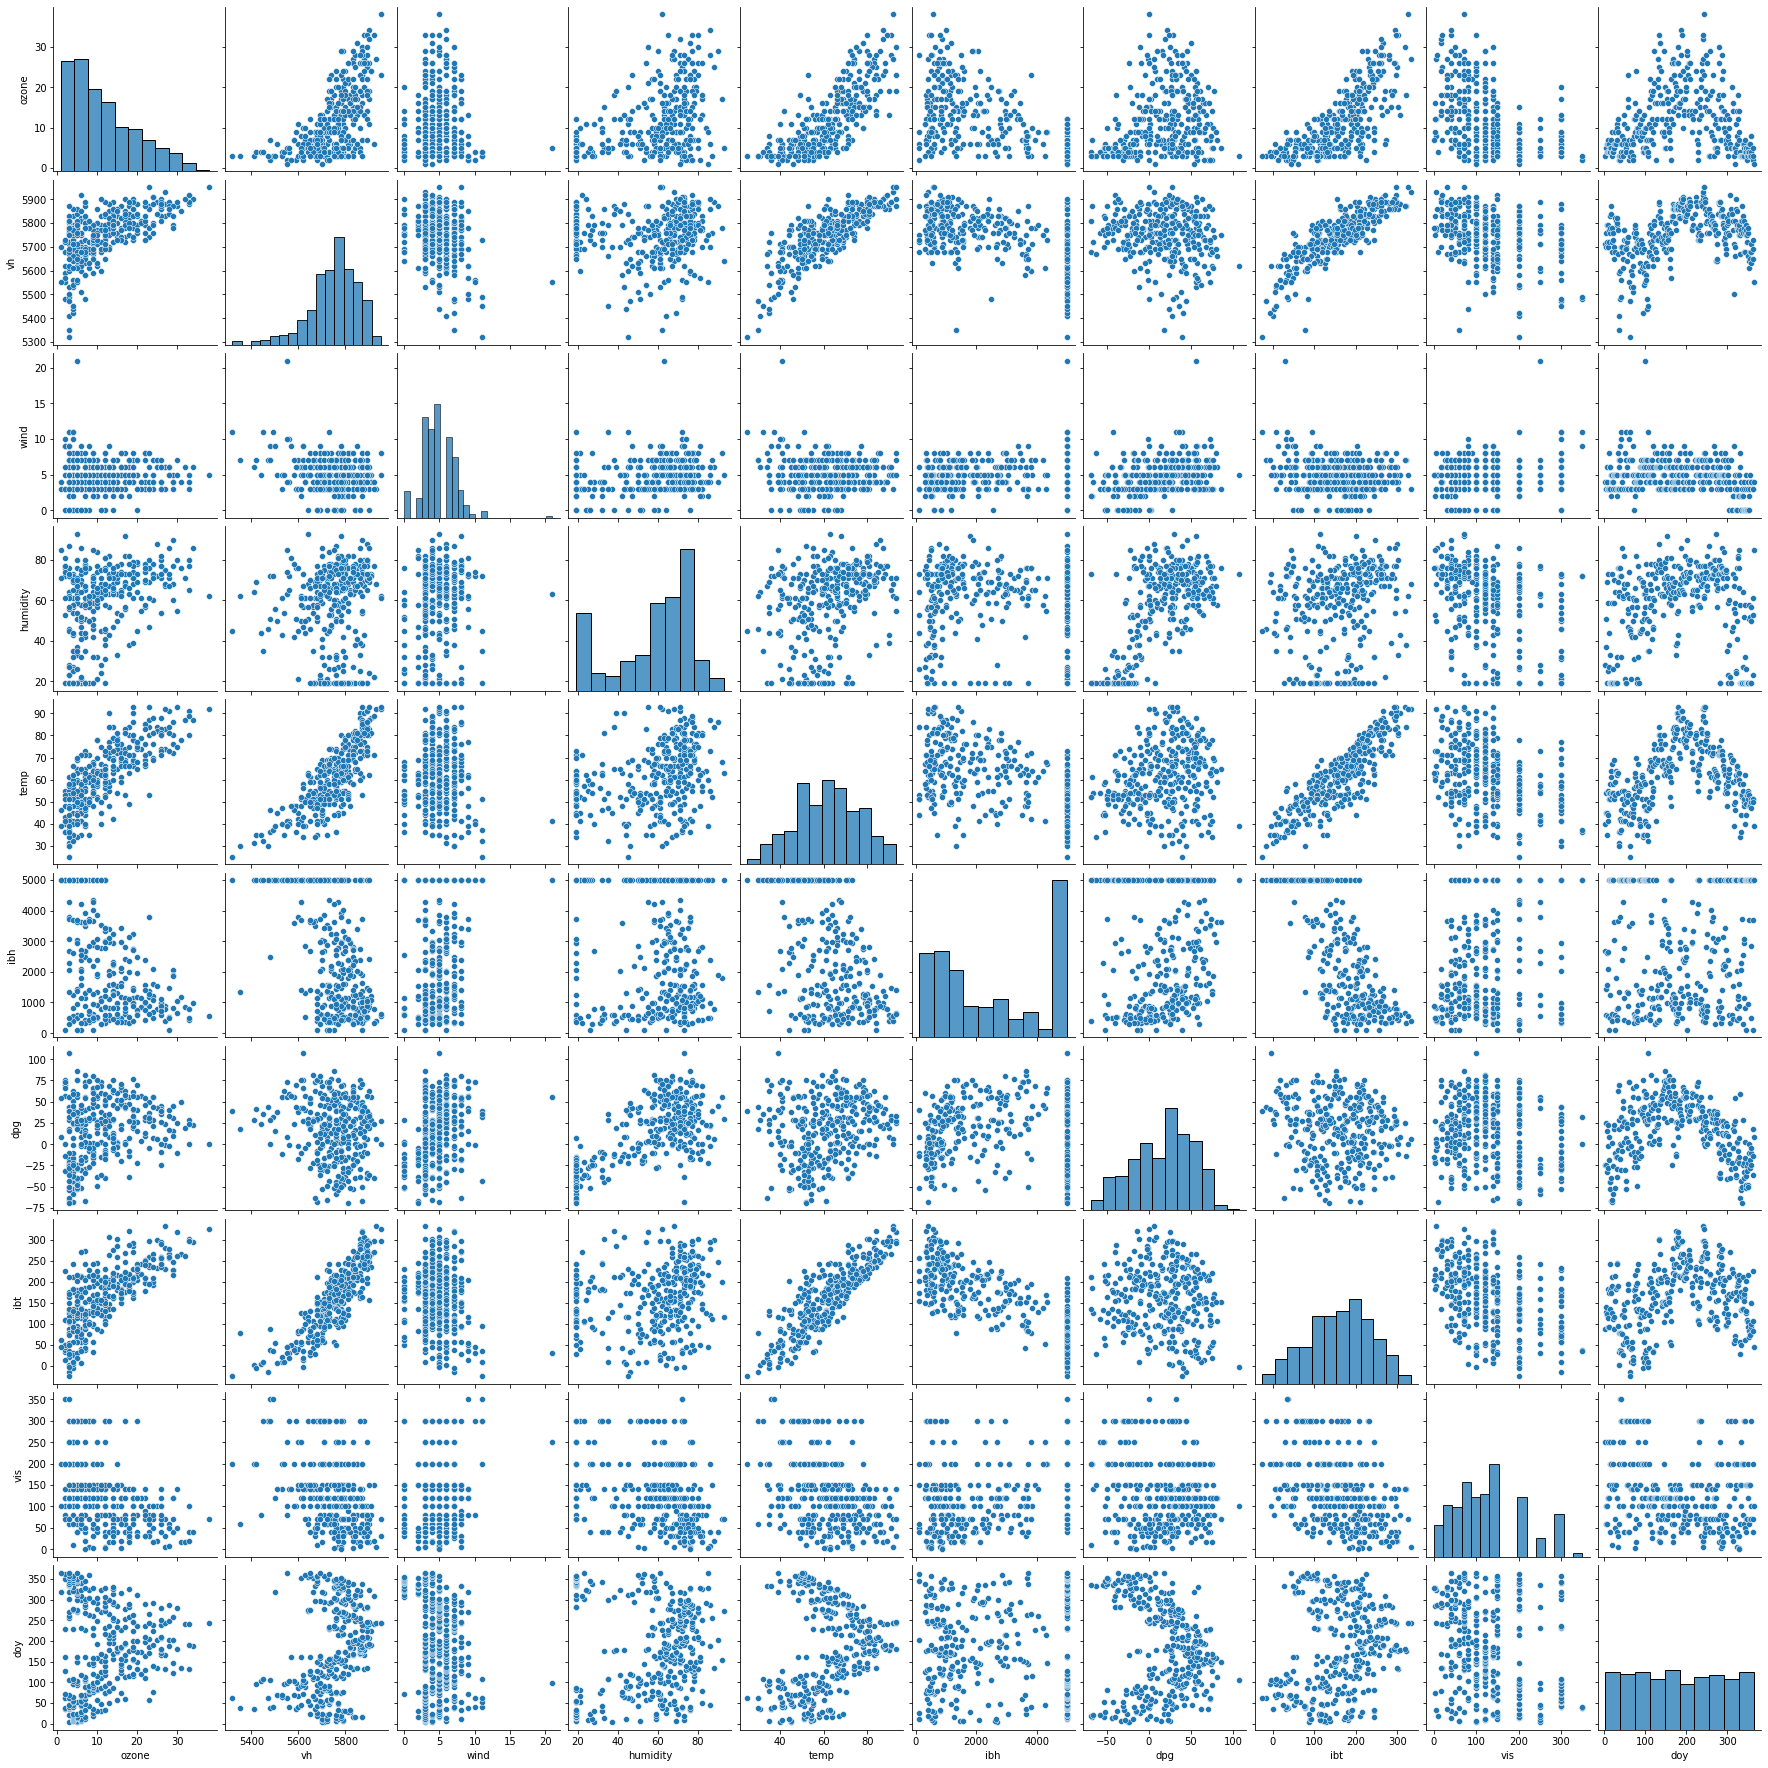

In [9]:
sns.pairplot(data)

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/credit.csv')

In [5]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


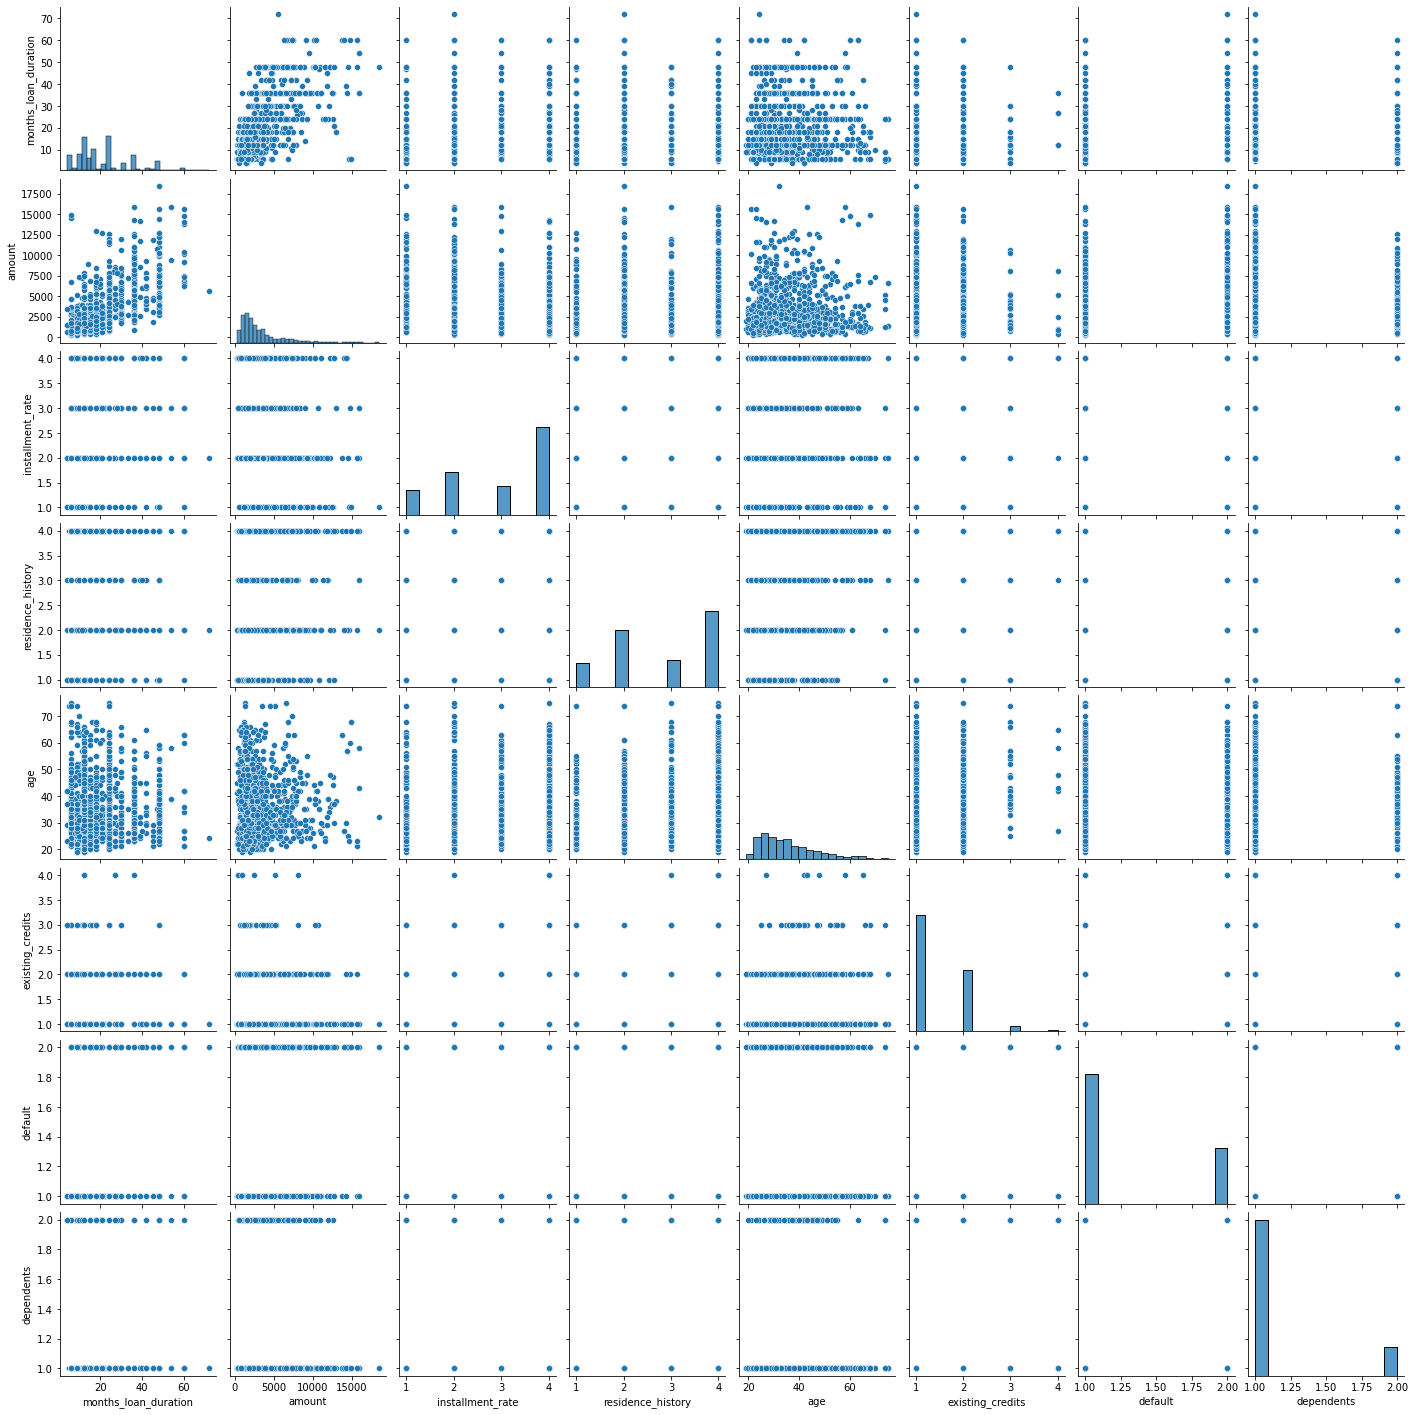

In [11]:
sns.pairplot(data)

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/whitewines.csv')

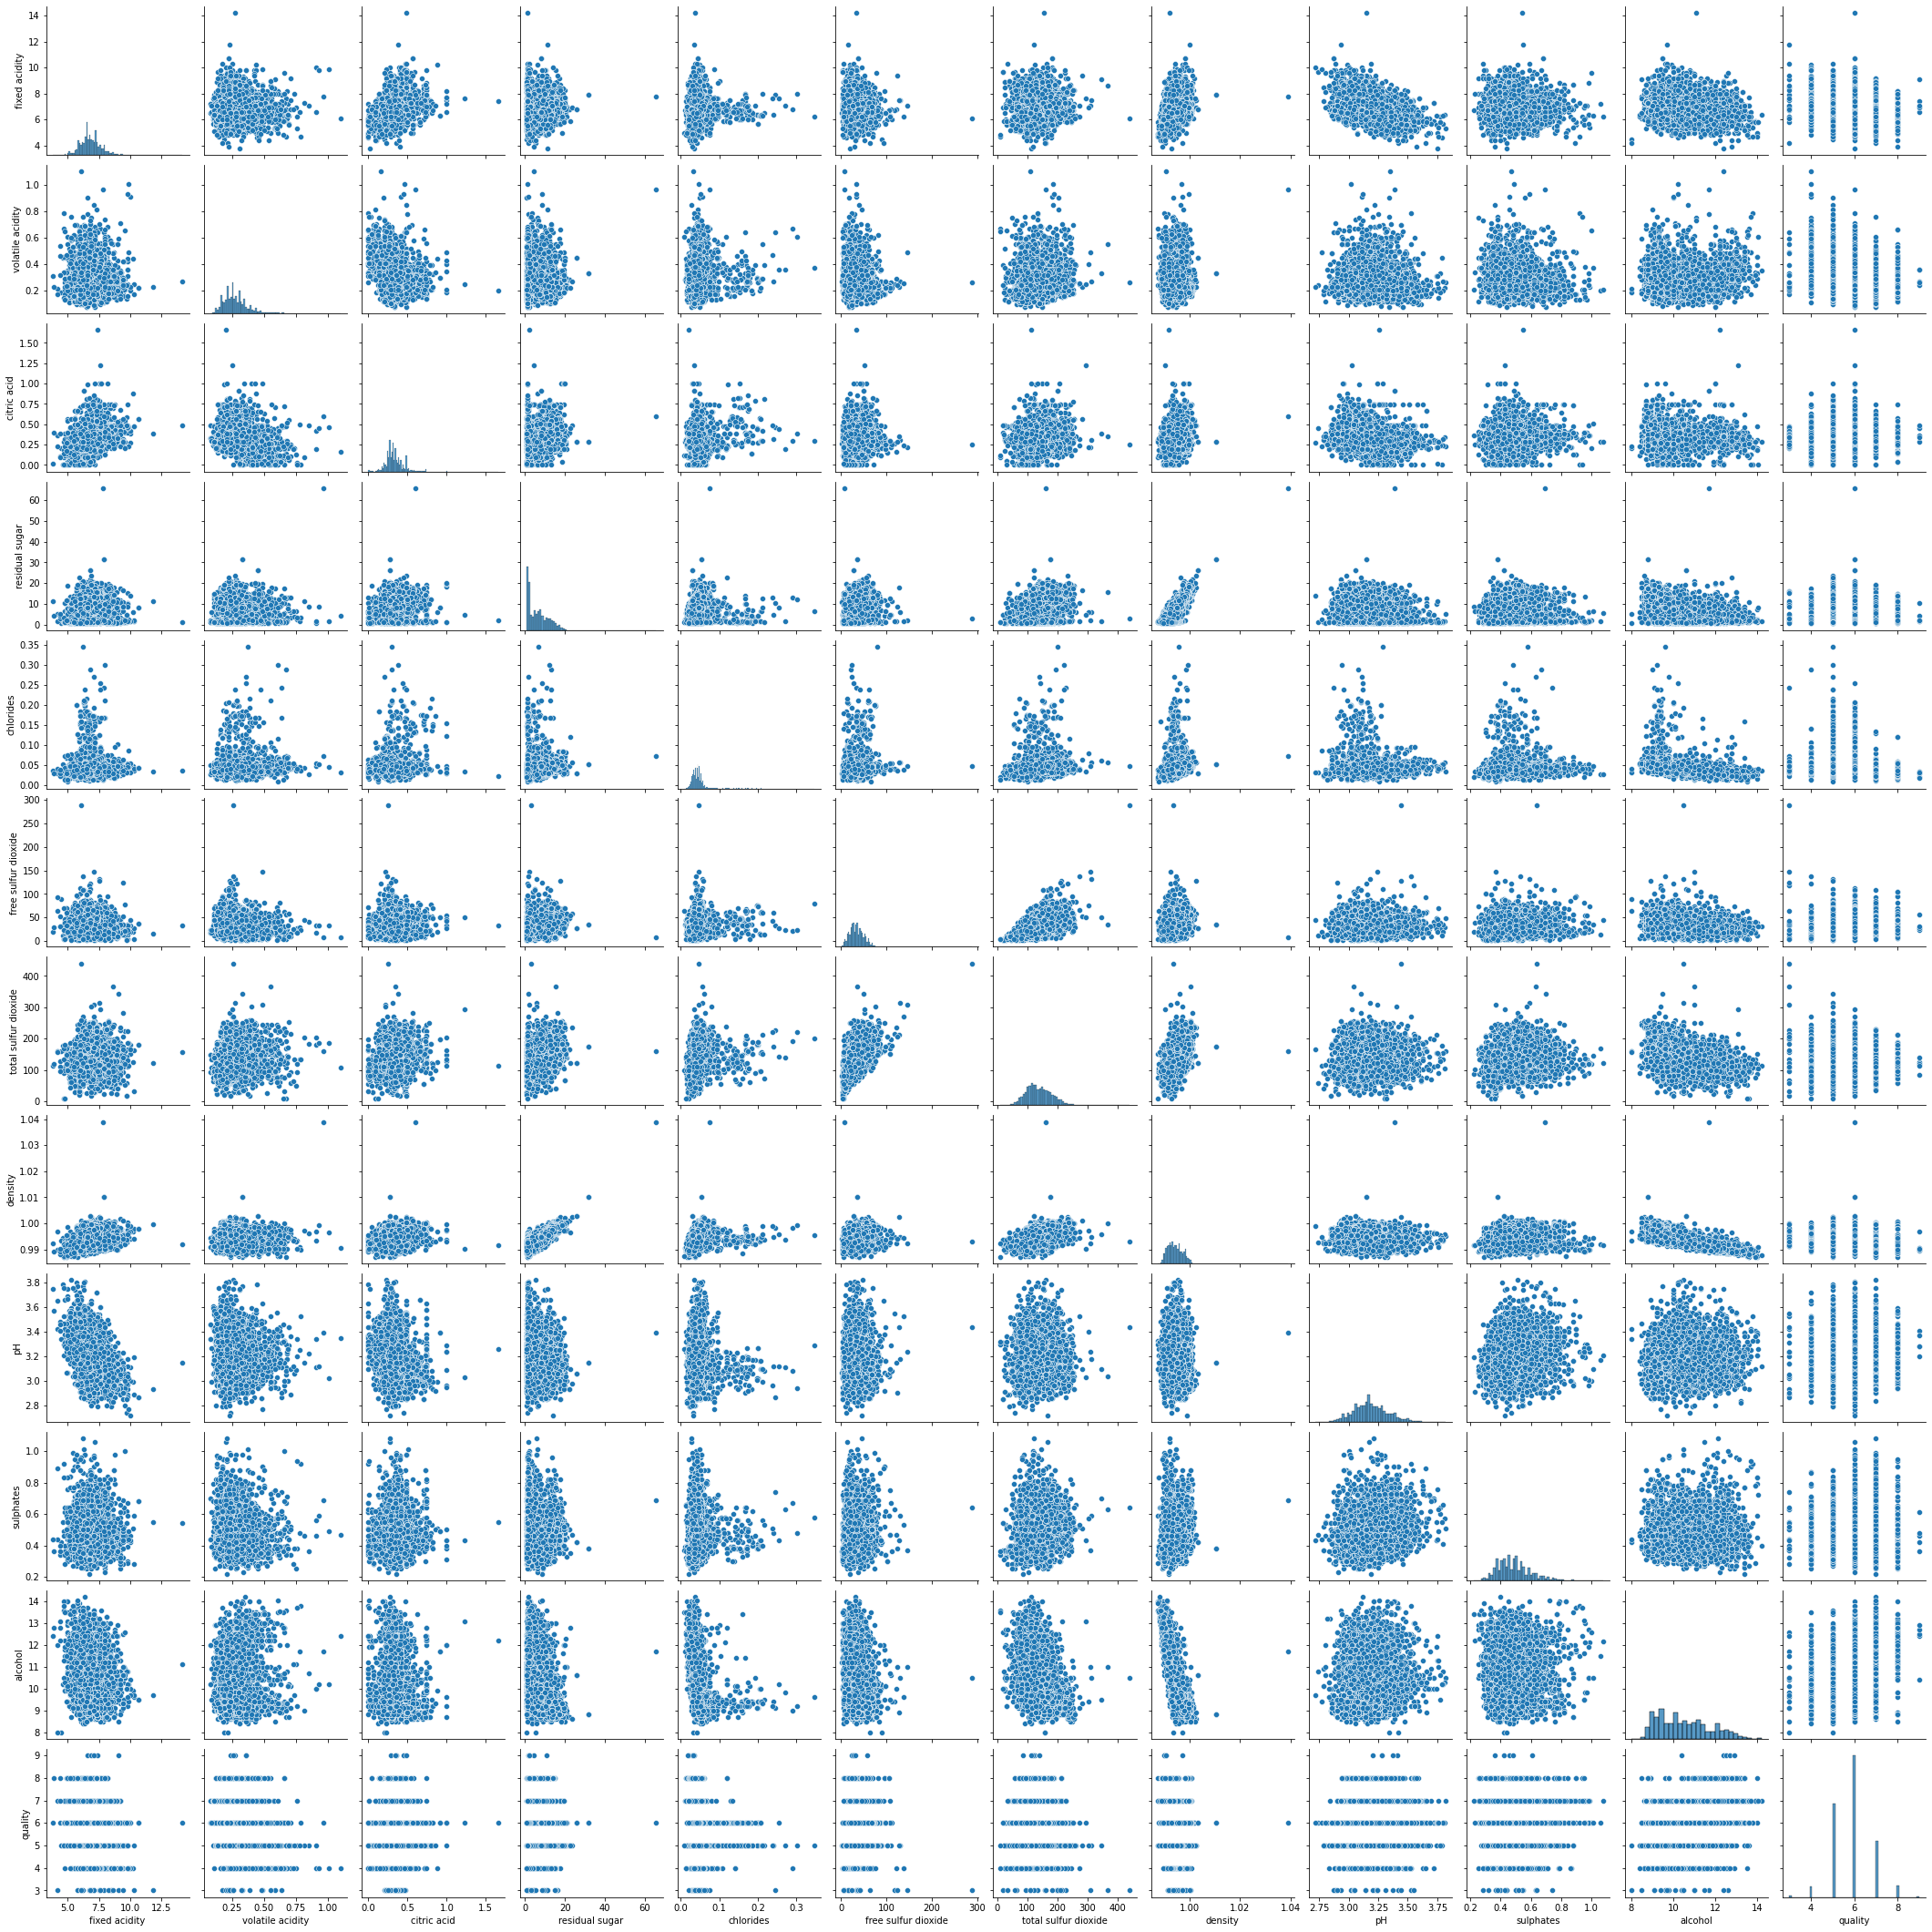

In [15]:
sns.pairplot(data)

In [12]:
data.head()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,3
1,5,5700,3,37,45,590,-24,128,100,4
2,5,5760,3,51,54,1450,25,139,60,5
3,6,5720,4,69,35,1568,15,121,60,6
4,4,5790,6,19,45,2631,-33,123,100,7


let's try to predict ozone

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



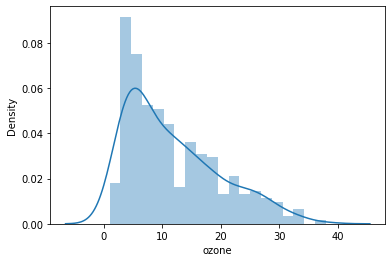

In [20]:
sns.distplot(data['ozone'],bins=20)

is this normally distributed?

In [21]:
data.columns

Index(['ozone', 'vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis',
       'doy'],
      dtype='object')

In [51]:
365-91

274

In [58]:
var = np.where((data['doy']>=91) & (data['doy']<=274),1,0)

In [60]:
data.insert(len(data.columns),'YearPoint2',var)

In [61]:
data.head()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,YearPoint,YearPoint2
0,3,5710,4,28,40,2693,-25,87,250,3,0,0
1,5,5700,3,37,45,590,-24,128,100,4,0,0
2,5,5760,3,51,54,1450,25,139,60,5,0,0
3,6,5720,4,69,35,1568,15,121,60,6,0,0
4,4,5790,6,19,45,2631,-33,123,100,7,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



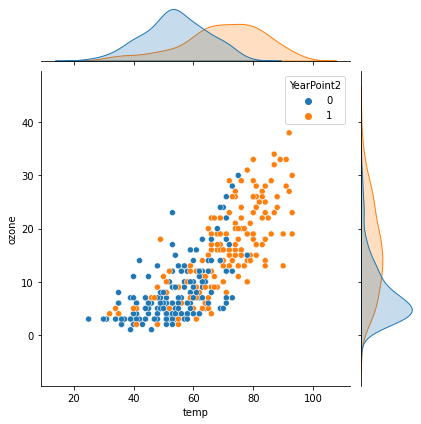

In [62]:
sns.jointplot(data['temp'],data['ozone'],hue=data['YearPoint2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



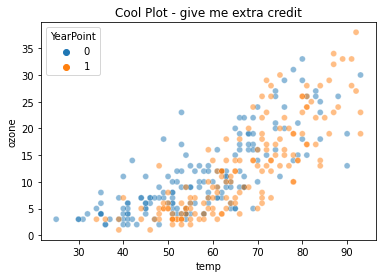

In [49]:
sns.scatterplot(data['temp'],data['ozone'],hue=data['YearPoint'],alpha=.5)
plt.title('Cool Plot - give me extra credit')
plt.show()

wind does not appear related to ozone

Temp does

In [29]:
data.isnull().any() # this uses isnull method and then the any method, which looks for tru

ozone       False
vh          False
wind        False
humidity    False
temp        False
ibh         False
dpg         False
ibt         False
vis         False
doy         False
dtype: bool

In [65]:
X = np.array(data['temp']).reshape(data.shape[0],1)
y = data['ozone']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



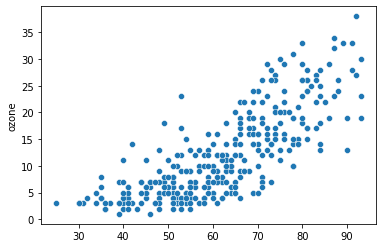

In [66]:
sns.scatterplot(X[:,0],y)

In [71]:
data.corr()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,YearPoint,YearPoint2
ozone,1.000000,0.607344,-0.013414,0.449224,0.780703,-0.589534,0.214046,0.745578,-0.440989,0.066200,0.105271,0.500509
vh,0.607344,1.000000,-0.243664,0.074485,0.808059,-0.504835,-0.148071,0.852021,-0.360080,0.337397,0.422373,0.234922
wind,-0.013414,-0.243664,1.000000,0.210293,-0.032070,0.206596,0.335747,-0.179517,0.147227,-0.246444,-0.186814,0.290605
humidity,0.449224,0.074485,0.210293,1.000000,0.340474,-0.242328,0.647789,0.203648,-0.401008,0.040703,0.095117,0.458901
temp,0.780703,0.808059,-0.032070,0.340474,1.000000,-0.532645,0.189242,0.864787,-0.387721,0.238003,0.295371,0.548726
ibh,-0.589534,-0.504835,0.206596,-0.242328,-0.532645,1.000000,0.037078,-0.776933,0.386686,0.043400,0.036845,-0.179833
dpg,0.214046,-0.148071,0.335747,0.647789,0.189242,0.037078,1.000000,-0.095060,-0.125855,-0.154138,-0.154573,0.632352
ibt,0.745578,0.852021,-0.179517,0.203648,0.864787,-0.776933,-0.095060,1.000000,-0.422372,0.219172,0.266752,0.317355
vis,-0.440989,-0.360080,0.147227,-0.401008,-0.387721,0.386686,-0.125855,-0.422372,1.000000,-0.216976,-0.199353,-0.148152
doy,0.066200,0.337397,-0.246444,0.040703,0.238003,0.043400,-0.154138,0.219172,-0.216976,1.000000,0.868494,-0.019720


Can I predict the ozone based on temperature?

What kind of model should we use here?

In [159]:
model = LinearRegression()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results1 = model_selection.cross_val_score(model,X,y,cv=kfold)
ymodel1 = model_selection.cross_val_predict(model,X,y,cv=kfold)
print(results1.mean(),results1.std())

1.0 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'residuals')

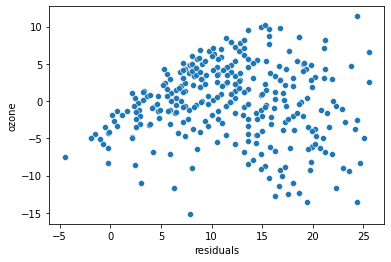

In [93]:
sns.scatterplot(ymodel1,ymodel1-y)
plt.xlabel('residuals')

In [158]:
p = PolynomialFeatures(2) # create the polynomial object we are interested in
X_p = p.fit_transform(X) # get the transformed features

model = LinearRegression()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results2 = model_selection.cross_val_score(model,X_p,y,cv=kfold)
ymodel2 = model_selection.cross_val_predict(model,X_p,y,cv=kfold)
print(results2.mean(),results2.std())

1.0 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'residuals')

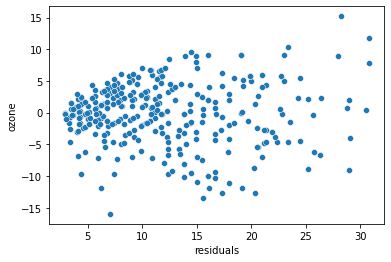

In [95]:
sns.scatterplot(ymodel2,ymodel2-y)
plt.xlabel('residuals')

In [110]:
sns.set_context('notebook')

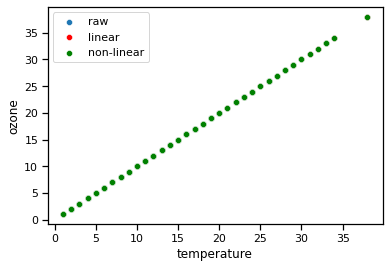

In [160]:
sns.scatterplot(x= X[:,0],y =y,label='raw')
sns.scatterplot(x = X[:,0],y=ymodel1,color='r',label='linear')
sns.scatterplot(x = X[:,0],y= ymodel2,color='g',label='non-linear')
#sns.scatterplot(x = X[:,0],y= ymodel_whoa,color=[0,.5,1],label='non-linear')
plt.xlabel('temperature')
plt.legend()
plt.show()

We want to use cross validation to evaluate our prediction

Kfold is a good method

our data is ordered

In [63]:
data.head(20)

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy,YearPoint,YearPoint2
0,3,5710,4,28,40,2693,-25,87,250,3,0,0
1,5,5700,3,37,45,590,-24,128,100,4,0,0
2,5,5760,3,51,54,1450,25,139,60,5,0,0
3,6,5720,4,69,35,1568,15,121,60,6,0,0
4,4,5790,6,19,45,2631,-33,123,100,7,0,0
5,4,5790,3,25,55,554,-28,182,250,8,0,0
6,6,5700,3,73,41,2083,23,114,120,9,0,0
7,7,5700,3,59,44,2654,-2,91,120,10,0,0
8,4,5770,8,27,54,5000,-19,92,120,11,0,0
9,6,5720,3,44,51,111,9,173,150,12,0,0


can we use the ozone to predict whether its hot or cold outside?

In [113]:
X = np.array(data['ozone']).reshape(data.shape[0],1)
y = data['YearPoint2']

Text(0, 0.5, 'ozone')

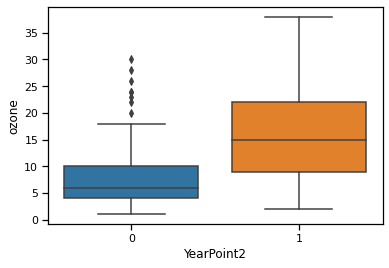

In [116]:
sns.boxplot(y=X[:,0],x=y)
plt.ylabel('ozone')

In [120]:
model = LogisticRegression()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results1 = model_selection.cross_val_score(model,X,y,cv=kfold)
ymodel1 = model_selection.cross_val_predict(model,X,y,cv=kfold)
print(results1.mean(),results1.std())

0.7333333333333332 0.018181818181818167


In [126]:
model = tree.DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results2 = model_selection.cross_val_score(model,X,y,cv=kfold)
ymodel2 = model_selection.cross_val_predict(model,X,y,cv=kfold)
print(results2.mean(),results2.std())

0.6666666666666666 0.05160420110886789


In [121]:
fpr, tpr, thresholds = metrics.roc_curve(y,ymodel1)

In [127]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y,ymodel2)

roc plot

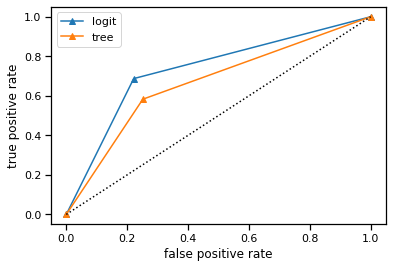

In [133]:
plt.plot(fpr,tpr,marker='^',label='logit')
plt.plot(fpr2,tpr2,marker='^',label='tree')
plt.plot([0,1],[0,1],linestyle=':',color=[0,0,0])

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

plt.show()

In [134]:
data.columns

Index(['ozone', 'vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis',
       'doy', 'YearPoint', 'YearPoint2'],
      dtype='object')

In [155]:
y = data['ozone']

In [156]:
model = LinearRegression()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results_whoa = model_selection.cross_validate(model,data[['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis']],y,cv=kfold,return_train_score=True)
ymodel_whoa = model_selection.cross_val_predict(model,data[['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis']],y,cv=kfold)
print(results_whoa)

{'fit_time': array([0.00267029, 0.00136852, 0.00134516, 0.00137782, 0.00132084]), 'score_time': array([0.00106692, 0.00097203, 0.00096416, 0.00097013, 0.0009737 ]), 'test_score': array([0.71223922, 0.6881788 , 0.66725732, 0.6629197 , 0.62854082]), 'train_score': array([0.68394321, 0.68893242, 0.69144716, 0.69659185, 0.69893447])}


In [150]:
results_whoa['train_score']

array([0.68394321, 0.68893242, 0.69144716, 0.69659185, 0.69893447])

In [151]:
results_whoa['test_score']

array([0.71223922, 0.6881788 , 0.66725732, 0.6629197 , 0.62854082])